# Sınıflandırma Performansının Değerlendirilmesi

Sınıflandırma, sınıfı zaten bilinen gözlemleri içeren bir dizi veriyle algoritmanın eğitilmesi temelinde, yeni bir gözlemin hangi sınıfa ait olduğunu belirleme tekniğidir.

Bir sınıflandırma problemini irdeleyerek, Scikit-learn kütüphanesi ile bu sınıflandırmanın performansını farklı metriklerle değerlendireceğiz.

Sıklıkla kullanılan `diabetes.csv` veri setini kullanacağız ve Rastgele Orman algoritmasını kullanarak sınıflandırma yapacağız.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dia=pd.read_csv('diabetes.csv')
dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Bağımlı değişken olan `Outcome` sütunu, hastaların diyabet tanısı alıp almadığını göstermektedir. Diğer sütunlar ise bağımsız değişkenlerdir. Veri setini buna uygun olarak sütunlarına parçalayıp, %70-30 eğitim-test verisi olarak ayıralım.

In [4]:
x=dia.drop('Outcome',1)
y=dia.Outcome

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

Standart olarak rastgele orman sınıflayıcıyı oluşturalım.

In [5]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

Eğitilen sınıflayıcıyı kullanarak, test verileri üzerinde tahmin işlemini gerçekleştirelim. 

In [6]:
pred=rfc.predict(X_test)

## 1) Karmaşıklık Matrisi (Confusion Matrix)

Bir karmaşıklık matrisi (veya) hata matrisi, kullanıcının tipik olarak denetimli bir algoritmanın performansını görselleştirmesine olanak tanıyan bir tablo düzenidir. Kullanıcının modelin doğruluğunu ve tahminlerin ne kadar doğru olduğunu incelemesine yardımcı olur

Aşağıdaki resimde gördüğünüz gibi 1 sayısı diyabetli kişiler için ve 0 sayısı da diyabetik olmayanlar kullanılmıştır.

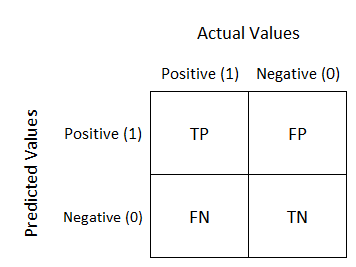

**True Positive (TP):** Gerçek pozitifler, kişinin gerçekten diyabetik olduğu (1) ve modelin kişinin diyabetik olduğunu (1) öngörebildiği doğru durumlardır.

**False Positive (FP):** Yanlış pozitifler, kişinin aslında diyabetik olmadığı (0), ancak modelin onu diyabetik hasta (1) olarak öngördüğü durumlardır. Buna yanlış pozitif denir.

**True Negative (TN):** Gerçek Negatifler,  kişinin diyabeti olmadığı (0) ve modelin kişinin diyabeti olmadığını (0) doğru bir şekilde öngördüğü durumlardır. Bu doğru bir tahmindir.

**False Negative (FN):** Yanlış Negatifler, gerçek sınıftaki kişinin diyabetli olduğu (1) ancak modelin kişinin diyabetli olmadığını (0) öngördüğü durumlardır.

Gerçek sınıfları ve tahmin edilen sınıfları girdi olarak alan scikit-learn `confusion_matrix` fonksiyonu ile karmaşıklık matrisini (2x2 dizi olarak) elde edebiliriz.

In [8]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,pred)

array([[140,  17],
       [ 34,  40]])

## 2) Accuracy (Doğruluk Skoru)

Doğruluk skoru (accuracy), model tarafından doğru tahmin edilen gözlemlerin yapılan yapılan tüm tahmin sayısına oranıdır. Gerçek pozitiflerin ve gerçek negatiflerin toplamını alır ve bunları model tarafından yapılan tüm tahminlerin toplamına böler. Doğruluk skoru, veri setindeki sınıf dağılımı dengeli olduğunda kullanılmalıdır. Denge olmadığında, kullanılması önerilmemektedir.

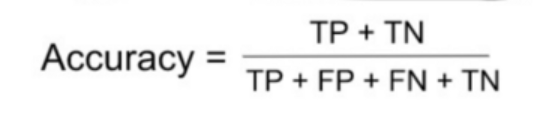

In [11]:
from sklearn.metrics import accuracy_score

# Eğitim Doğruluğu
accuracy_score(y_train,rfc.predict(X_train))



1.0

In [12]:
# Test Doğruluğu
accuracy_score(y_test, rfc.predict(X_test))

0.7792207792207793

## 3) Precision (Kesinlik skoru)

Precision skoru, doğru tahmin edilen pozitif gözlemlerin, model tarafından tahmin edilen toplam pozitif gözlem sayısına oranı olarak söylenebilir. Pozitiflerin ne kadarının doğru tahmin edildiğini görmek için kullanılır.

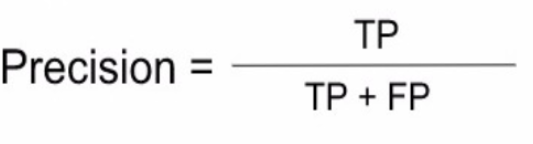

In [13]:
from sklearn.metrics import precision_score

precision_score(y_test,pred)

0.7017543859649122

## 4) Recall (Hassasiyet) Skoru

Recall skoru, doğru tahmin edilen pozitif gözlemlerin gerçek sınıftaki tüm tahmin edilen gözlemlere oranı olarak söylenebilir, dolayısıyla bu skorun gerçek sınıfın ne kadarının doğru tahmin edildiğini bulmamıza yardımcı olduğunu söyleyebiliriz.

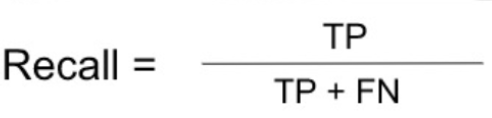

In [14]:
from sklearn.metrics import recall_score

recall_score(y_test,pred)

0.5405405405405406

## 5) F1 Skoru

F1 skoru, hem precision hem de recall skorlarının ağırlıklı ortalamasıdır. Bu skor, hem yanlış pozitifleri hem de yanlış negatifleri hesaba katar. F1 skoru, veri sınıflarının dengesiz dağıldığı durumlarda, accuracy skoruna göre daha kullanışlıdır.

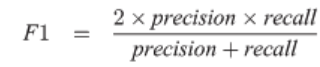

In [15]:
from sklearn.metrics import f1_score

f1_score(y_test,pred)

0.6106870229007634

## 6) ROC Eğrileri

ROC Eğrileri (Receiver Operating Characteristics) ve bu eğrilerin altında kalan alan (Area Under ROC Curve - AUC), ikili sınıflandırma probleminin performansını değerlendirmek için kullanılan bir performans ölçütüdür.

ROC bir olasılık eğrisidir. AUC ise, modelin sınıflar arasında ne kadar iyi ayrım yapabildiğini belirtir. AUC ne kadar yüksekse, model pozitif sınıfları pozitif ve negatif sınıfları negatif olarak tahmin etmede daha iyidir.

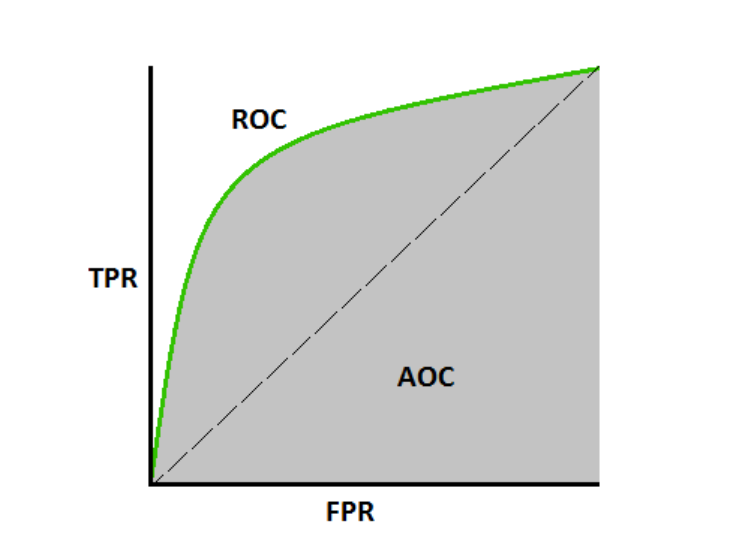

Mükemmel bir modelin AUC değeri 1 olacaktır, bu da modelin sınıfları hatasız olarak ayırt edebileceği anlamına gelir. AUC=0 olan bir model, herhangi bir ayrılabilirlik ölçüsü olmayan en kötü model olarak kabul edilir. 

`roc_curve` işlevi üç liste oluşturur:
thresholds = azalan sırada tüm benzersiz tahmin olasılıkları
fpr =  yanlış pozitif oranı (FP / (FP + TN))
tpr = doğru pozitif oranı (TP / (TP + FN))

In [16]:
from sklearn.metrics import roc_curve

fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test,pred)

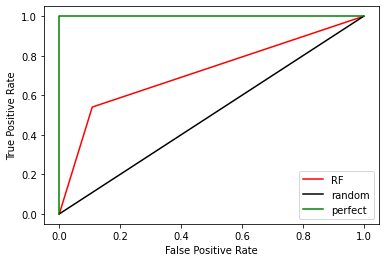

In [17]:
plt.plot(fpr_RF, tpr_RF,'r-',label = 'RF')
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Bu şekilden gözlemleyebileceğimiz birkaç şey var:

- Sınıfı rastgele tahmin eden bir model  (random) siyah çizgiyle sonuçlanacaktır ve bu siyah çizginin üzerinde bir eğriye sahip istemekteyiz.


- Siyah çizgiden daha uzakta olan bir ROC daha iyidir.

- Performansı analiz etmek için eğrinin altındaki alan metriğini kullanacağız.

In [18]:
from sklearn.metrics import roc_auc_score
auc_RF = roc_auc_score(y_test,pred)
print('AUC RF:%.3f'% auc_RF)

AUC RF:0.716


In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.85       157
           1       0.70      0.54      0.61        74

    accuracy                           0.78       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.77      0.78      0.77       231



# Regresyon Performansının Değerlendirilmesi

Sürekli bir niceliği tahmin ettiğimiz için regresyon performans ölçütleri, sınıflandırma ölçütlerinden farklıdır. 

Regresyon modelini değerlendirmek için kullanılan temel metrikler aşağıda sunulmuştur.

## 1) Ortalama Mutlak Hata (Mean Absolute Error - MAE)

Ortalama mutlak hata (MAE), modelin tahmin hatasını hesaplamak için kullanılan en yaygın ölçütlerden biridir. Tek bir veri satırının tahmin hatası:

***Tahmin Hatası = Gerçek Değer - Tahmin Edilen Değer***

Her veri satırı için tahmin hatalarını hesaplamamız, mutlak değerlerini almamız ve ardından tüm mutlak tahmin hatalarının ortalamasını bulmamız gerekiyor.

MAE aşağıdaki formülle hesaplanır:

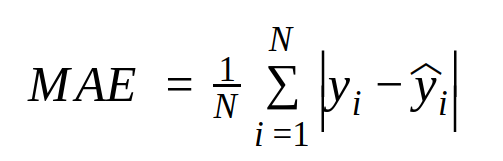

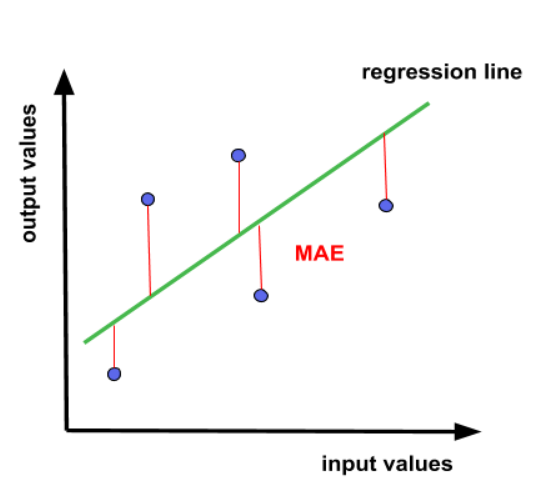

Yukarıdaki grafik, fark (residual) değerlerini temsil eder - tahmin edilen değerler (regresyon çizgisi) ve çıktı değerleri arasındaki farkları göstermektedir. MAE, farkların mutlak değerini kullanır, tek tek bütün fark değerlerini topladığımız için, her farkın toplam hataya doğrusal olarak katkısını belirtir. Bu nedenle, küçük MAE, modelin tahminde harika olduğunu öne sürer. Benzer şekilde, büyük bir MAE, modelinizin iyi genelleme yapmakta sorun yaşayabileceğini gösterir. MAE = 0, modelimizin mükemmel tahminler verdiği anlamına gelir, ancak bunun gerçek senaryolarda gerçekleşmesi olası değildir.

## 2) Ortalama Karesel Hata (Mean Squared Error - MSE)

Ortalama karesel hata (MSE), gerçek ve tahmin edilen değerler arasındaki ortalama kare farkını alır. Bu ölçüt, birçok regresyon problemi için yaygın olarak kullanılmaktadır.

MSE aşağıdaki formülle hesaplanır:

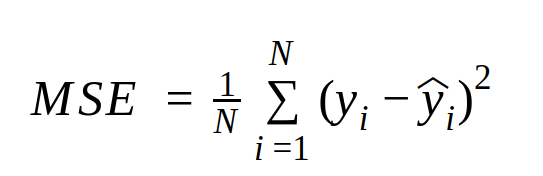

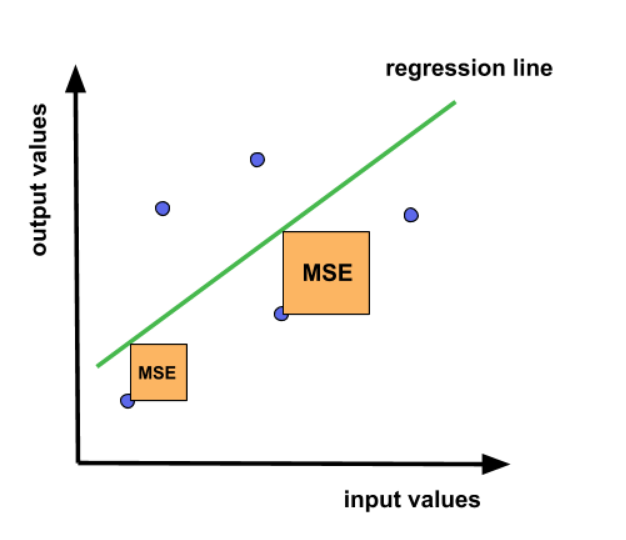

MSE neredeyse her zaman MAE'den daha büyük olacaktır çünkü MAE'de fark değerleri toplam hataya doğrusal olarak katkıda bulunurken, MSE'de hata her fark değeri ile ikinci dereceden katkı sağlamaktadır. Bu nedenle MSE, fazla fark değerlerini güçlü bir şekilde cezalandırdığı için modelin verilere ne ölçüde uyduğunu belirlemek için kullanılır.

## 3) R2 Skoru

R2 skoru, regresyon tahminlerinin gerçek veri noktalarına ne kadar iyi yaklaştığını belirler.

R2 skoru aşağıdaki formülle hesaplanır:

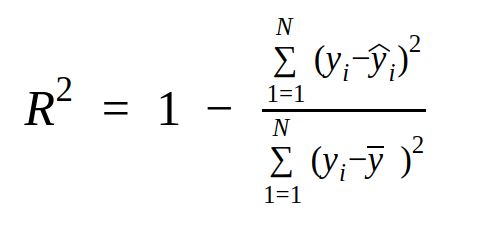

R2 skoru, 0'dan 1'e kadar değerler alabilir. 1 değeri, regresyon tahminlerinin verilere mükemmel şekilde uyduğunu gösterir.

## Örnek Uygulama

Basit Doğrusal Regresyon ünitesinde kullandığımız `bas_beyin.csv` dosyası üzerine tekrar çalışalım. 

In [20]:
from google.colab import files
uploaded = files.upload()

Saving bas_beyin.csv to bas_beyin.csv


In [21]:
bas_beyin = pd.read_csv("bas_beyin.csv")
bas_beyin.head()

,Cinsiyet,Yas_Araligi,Bas_cevresi(cm^3),Beyin_agirligi(gr)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [22]:
X = bas_beyin['Bas_cevresi(cm^3)'].values  # Bağımsız Değişken
y= bas_beyin['Beyin_agirligi(gr)'].values  # Bağımlı Değişken

In [23]:
X = X.reshape((len(X),1))

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [25]:
from sklearn.linear_model import LinearRegression
modelRegresyon = LinearRegression()
modelRegresyon.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = modelRegresyon.predict(X_test)

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [28]:
print("R-Kare: ", r2_score(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))

R-Kare:  0.6714867305931105
MAE:  59.94293181484946
MSE:  5346.3511172226645


In [29]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [30]:
y_pred = rf.predict(X_test)

In [31]:
print("R-Kare: ", r2_score(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))

R-Kare:  0.5112421987255189
MAE:  68.66454629629628
MSE:  7954.232173369597
